In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Tabelle 1, 1a, R=48.7
U_1_1 = np.array([-.14,-.08,-.04,0,0.08,.12,.12,.2])
dU_1_1 = np.array([.02,.01,.02,.02,.02,.02,.02,.02])
U_A_1 = np.array([3.16,2.44,1.62,1.16,0.32,-0.2,-1.16,-2.56])
dU_A_1 =np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02]) 

#Tabelle 2, 1a, R=274
U_1_2 = np.array([-.24,-.2,-.12,-.04,.04,.08,.16,.2])
dU_1_2 = np.array([0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
U_A_2 = np.array([26.4,23.2,16.8,9.2,.8,-2.4,-8,-12.4])
dU_A_2 = np.array([0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

#Tabelle 3, 1b
#R=274
U_G_3 = np.array([.085,.25,.332,.494,.66,.824,.984])
dU_G_3 = np.array([.001,.002,.002,.002,.002,.002,.004])
U_1_3 = U_G_3
dU_1_3 = dU_G_3
U_A1_3 = np.array([7,21.5,28.5,42.6,56.8,70.8,84.8])
dU_A1_3 = np.array([.04,.2,.2,.2,.2,.2,.2])
#R=680
U_G_31=np.array([0.085,0.25,0.5,0.62,0.74,0.988])
dU_G_31=np.array([0.002,0.002,0.002,0.003,0.004,0.004])
U_1_31=U_G_31
dU_1_31=dU_G_31
U_A2_3 = np.array([17.1,52,103,129,155,208])
dU_A2_3 = np.array([.1,.3,1,1,1,1])

#Tabelle 4, 2a und 2b
#R=680
f_1=np.array([.1,.3,.9,1.2,4,8,20,60,90,150,210,300])*1000
df_1=np.array([.0002,.001,.001,.001,.003,.006,.02,.06,.09,.1,.5,.7])*1000
U_A1_4 = np.array([54,54,52.8,51.6,39.2,25.6,10.7,3.72,2.5,1.54,1.12,.79])
dU_A1_4 = np.array([1, 1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01])
#R=274
f_2=np.array([.1,.3,.8,2,6,9,20,50,90,150,200,300])*1000
df_2=np.array([.0002,.001,.001,.001,.001,.003,0.02,.06,.2,.3,.5,.7])*1000
U_A2_4 = np.array([21.4,21.6,21.4,21.6,18.8,16.6,10.2,4.32,2.48,1.52,1.05,.78])
dU_A2_4 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01])
#R=48.7
f_3=np.array([.1,.3,.8,2,6,9,20,60,90,150,220,300])*1000
df_3=np.array([.0002,.001,.001,.004,.005,.006,.01,.03,.07,.1,.6,.7])*1000
U_A3_4 = np.array([12.5,12.5,12.5,12.8,12.7,12.5,11.9,8.8,6.88,4.64,3.26,2.46])
dU_A3_4 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01])
#R=48.7 und C=560
f_4=np.array([0.1,0.5,0.9,2,6,9,20,50,90,120,220,300])*1000
df_4=np.array([0.0002,0.001,0.001,0.004,0.005,0.006,0.01,0.03,0.05,0.1,0.3,0.5])*1000
U_A4_4 = np.array([12.5,12.4,12.4,12.1,9.52,7.6,4.08,1.74,.99,.74,.42,.32])
dU_A4_4 = np.array([0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

#Tabelle 5, 2c
f_5 = np.array([0.1,0.5,0.9,1.5,6,9,15,60,90,130,210,300])*1000
df_5 = np.array([0.0002,0.001,0.001,0.002,0.005,0.006,0.01,0.03,0.05,0.1,0.3,0.5])*1000
U_A_5 = np.array([1.5,6.84,8.72,10.8,12.6,12.6,12.3,8.68,6.8,5.2,3.42,2.46])
dU_A_5 = np.array([0.1, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1,0.01,0.01,0.01,0.01,0.01])


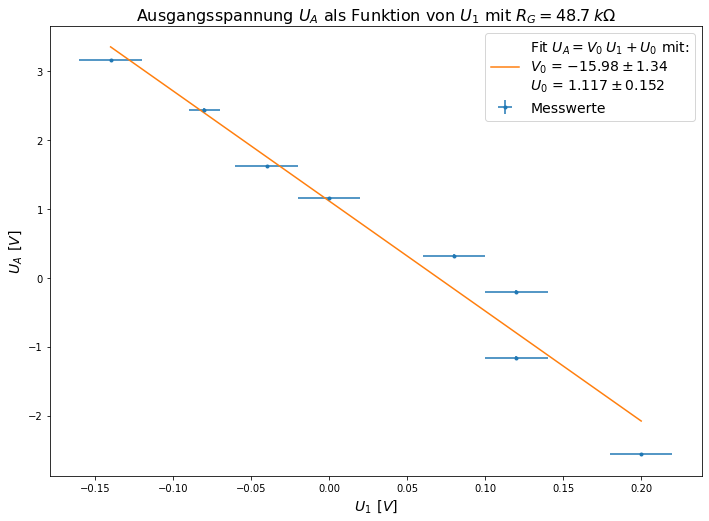

In [6]:
#1a, R1

#Definition der Fitfunktion
def fit_func(x, a, b): 
    return a*x+b

popt, pcov = curve_fit( fit_func, U_1_1, U_A_1, sigma = dU_A_1)

#Plot mit Fit
plt.errorbar(U_1_1, U_A_1, yerr=dU_A_1, xerr=dU_1_1, fmt=".", label="Messwerte")
plt.xlabel(r'$U_1 \:\: [V]$', fontsize=14)
plt.ylabel(r'$U_A \:\: [V]$', fontsize=14)
plt.title(r'Ausgangsspannung $U_A$ als Funktion von $U_1$ mit $R_G=48.7 \:k\Omega$', fontsize=16)
plt.plot(U_1_1, fit_func(U_1_1, *popt), label="\n".join([r"Fit $U_A = V_0 \: U_1 + U_0$ mit:"," = ".join([r'$V_0$',r'${:.2f}\pm{:.2f}\:$'.format(popt[0], np.sqrt(pcov[0][0]),{-1})])," = ".join([r'$U_0$',r'${:.3f}\pm{:.3f} \:$'.format( popt[1], np.sqrt(pcov[1][1]))])         ]))
plt.legend(loc="upper right", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("1a_R1.pdf", dpi=150)

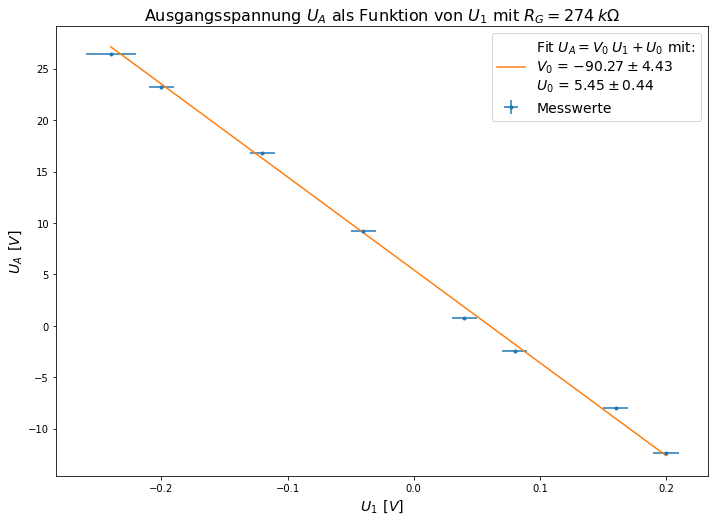

In [7]:
#1a, R2

popt, pcov = curve_fit( fit_func, U_1_2[2:7], U_A_2[2:7], sigma = dU_A_2[2:7])

#Plot mit Fit
plt.errorbar(U_1_2, U_A_2, yerr=dU_A_2, xerr=dU_1_2, fmt=".", label="Messwerte")
plt.xlabel(r'$U_1 \:\: [V]$', fontsize=14)
plt.ylabel(r'$U_A \:\: [V]$', fontsize=14)
plt.title(r'Ausgangsspannung $U_A$ als Funktion von $U_1$ mit $R_G=274 \:k\Omega$', fontsize=16)
plt.plot(U_1_2[0:8], fit_func(U_1_2[0:8], *popt), 
         label="\n".join([
             r"Fit $U_A = V_0 \: U_1 + U_0$ mit:",
             " = ".join([r'$V_0$',r'${:.2f}\pm{:.2f}\:$'.format(popt[0], np.sqrt(pcov[0][0]),{-1})]), 
             " = ".join([r'$U_0$',r'${:.2f}\pm{:.2f} \:$'.format( popt[1], np.sqrt(pcov[1][1]))])
         ]))
plt.legend(loc="upper right", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("1a_R2.pdf", dpi=150)

AttributeError: 'Line2D' object has no property 'Color'

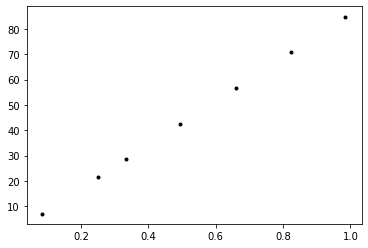

In [8]:
#1b

popt1, pcov1 = curve_fit( fit_func, U_1_3, U_A1_3, sigma = dU_A1_3)
popt2, pcov2 = curve_fit( fit_func, U_1_31, U_A2_3, sigma = dU_A2_3)

#Plot mit Fit
plt.errorbar(U_1_3, U_A1_3, yerr=dU_A1_3, xerr=dU_1_3, fmt=".", label=r"Messwerte mit $R_G=274 \:k\Omega$", color='black')
plt.errorbar(U_1_31, U_A2_3, yerr=dU_A2_3, xerr=dU_1_31, fmt=".", label=r"Messwerte mit $R_G=680 \:k\Omega$", Color='blue')
plt.xlabel(r'$U_1 \:\: [V]$', fontsize=14)
plt.ylabel(r'$U_A \:\: [V]$', fontsize=14)
plt.title(r'$U_A$ als Funktion von $U_1$ bei Wechselspannung', fontsize=16)
plt.plot(U_1_3, fit_func(U_1_3, *popt1), color='red' ,
         label="\n".join([
             r"Fit $U_A = V_0 \: U_1 + U_0$ mit:",
             " = ".join([r'$V_0$',r'${:.4f}\pm{:.4f}\:$'.format(popt1[0], np.sqrt(pcov1[0][0]),{-1})]), 
             " = ".join([r'$U_0$',r'${:.2f}\pm{:.2f} \:$'.format( popt2[1], np.sqrt(pcov2[1][1]))])
         ]))
plt.plot(U_1_31, fit_func(U_1_31, *popt2), color='orange',
         label="\n".join([" = ".join([r'$V_0$',r'${:.4f}\pm{:.4f}\:$'.format(popt2[0], np.sqrt(pcov2[0][0]),{-1})]),
                          " = ".join([r'$U_0$',r'${:.2f}\pm{:.2f} \:$'.format( popt2[1], np.sqrt(pcov2[1][1]))])
         ]))
plt.legend(loc="upper left", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("1b.pdf", dpi=150)

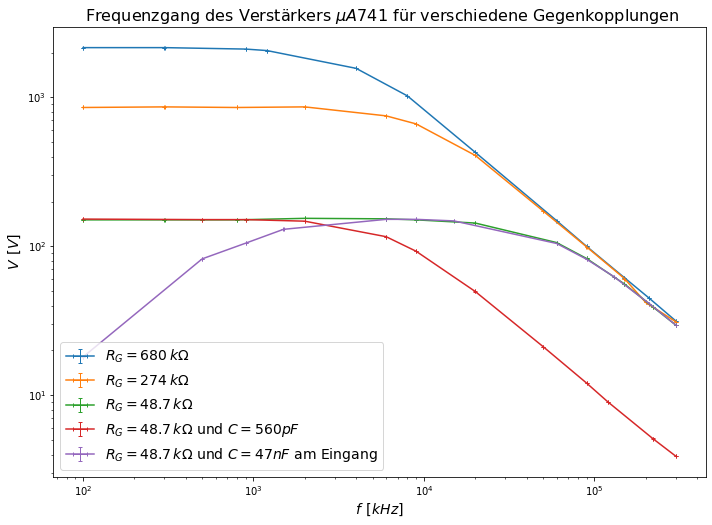

In [9]:
#Aufgabe 2

#Plot
plt.xlabel(r'$f \:\: [kHz]$', fontsize=14)
plt.ylabel(r'$V \:\: [V]$', fontsize=14)
plt.title(r' Frequenzgang des Verstärkers $\mu$$A741$ für verschiedene Gegenkopplungen', fontsize=16)
plt.yscale("log")
plt.xscale("log")

#Verstärkung V=U_A/U_1 als Funktion von f
plt.errorbar(f_1, U_A1_4/0.025, yerr=dU_A1_4, xerr=df_1, label=r"$R_G=680 \:k\Omega$", elinewidth=1, capsize=2)
plt.errorbar(f_2, U_A2_4/0.025, yerr=dU_A2_4, xerr=df_2, label=r"$R_G=274 \:k\Omega$", elinewidth=1, capsize=2)
plt.errorbar(f_3, U_A3_4/0.083, yerr=dU_A3_4, xerr=df_3, label=r"$R_G=48.7 \:k\Omega$", elinewidth=1, capsize=2)
plt.errorbar(f_4, U_A4_4/0.082, yerr=dU_A4_4, xerr=df_4, label=r"$R_G=48.7 \:k\Omega$ und $C=560 pF$", elinewidth=1, capsize=2)
plt.errorbar(f_5, U_A_5/0.083, yerr=dU_A_5, xerr=df_5, label=r"$R_G=48.7 \:k\Omega$ und $C=47 nF$ am Eingang", elinewidth=1, capsize=2)
plt.legend(loc="lower left", fontsize=14)

fig = plt.gcf()
fig.set_size_inches(11.69, 8.27)
plt.savefig("2.Frequenzgang.pdf", dpi=150)